# Aplicando *K-Means* para agrupamento de vinhos

O vinho é uma das bebidas mais conhecidas do mundo e tem uma longuíssima história, com as primeiras vinhas cultivadas por volta do ano 7000 a 5000 a.C na Geórgia, que pode apontar para o primeira evidência de vitcultura. Em seguida, na Armênia, por volta de 4000 a.C. os primeiro equipamentos para criados para produção da bebida. Em lendas como a de Gilgamesh e no relato bíblico do gênesis (antigos textos) mostram a presença da bebida, desde muito antes de muitas grandes e famosas civilizações. 

Além da região do Cáucaso, o vinho desenvolveu-se também no Antigo Egito (conforme hieróglifos da era pré-dinástica dos faraós), mais espeficamente na região do Vale do Nilo. Como o vinho era um bebida de difícil produção, então seu consumo era restrito a faraós e famílias importantes do Egito. A grande contribuição dos egípcios foi o processo de fermentação do vinho, que ao invés de deixarem fermentar sozinho, começaram a manejar esse processo.

A história do vinho também segue-se pela Grécia e Roma, mas foi na Idade Média (após a queda do império romano) que o consumo do vinho estava difundido em todo velho continente e era usado, principalmente, em banquetes. E nessa a França ascende como uma grande produtora vinho. O vinho francês ficou conhecido por sua qualidade e, essa fama, que perdura até os dias de hoje.

Existem diferentes tipos de vinhos nos dias de hoje, como:

1) **Vinhos Brancos**: leves, de corpo médio e encorpados;

2) **Vinhos Rosés**: leves e encorpados;

3) **Vinhos Tintos**: leves, de corpo médio e encorpados;

4) **Vinhos espumantes**: por tipos de fermentação (*Asti*, *Charmat* e *Champenoise*); 

5) **Vinhos de Sobremesa**: Colheita tardia, Botrytizados, Fortificados e Passificados.

Usaremos variantes tinto e branco do vinho "Vinho Verde" português. Esses vinhos foram os primeiros vinhos portugueses exportados para mercados europeus. Nos séculos XVI e XVII os vinhos do Vale do Minho e do Vale do Lima eram regularmente transportados para o norte da Europa nas mesmas embarcações que transportavam o bacalhau (bacalhau) e produtos manufaturados. 

Hoje a região dos Vinhos Verdes, ocupando o noroeste de Portugal, é uma das maiores e mais antigas regiões vinícolas do mundo.
A origem do nome Vinho Verde refere-se às características naturais da região, que produzem uma folhagem verde densa.

Será utilizado nesse trabalho o algoritmo de agrupamento *K-Means*.

## Dados


1 - *fixed acidity* (acidez fixa);

2 - *volatile acidity* (acidez volátil);

3 - *citric acid* (ácido cítrico);

4 - *residual sugar* (açúcar residual);

5 - *chlorides* (cloretos): a quantidade de sal no vinho;

6 - *free sulfur dioxide* (dióxido de enxofre livre);

7 - *total sulfur dioxide* (dióxido de enxofre total);

8 - *density* (densidade);

9 - *pH*;

10 - *sulphates* (sulfatos);

11 - *alcohol* (álcool);

A última variável é a de qualidade, mas para esse projeto não iremos utilizá-la.

12 - *quality* (qualidade - pontuação entre 0 e 10).

Os dados podem ser obtidos [aqui](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv) e [aqui](https://archive.ics.uci.edu/ml/datasets/Wine).


### Fontes

História do vinho : https://blog.famigliavalduga.com.br/a-historia-do-vinho-no-mundo-entenda-como-esta-bebida-colonizou-os-continentes/

Sobre a região do Vinho verde português :https://www.vinhoverde.pt/en/history-of-vinho-verde

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits import mplot3d 

C:\Users\junio\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Importação dos dados

In [2]:
vinho=pd.read_csv('winequality-red.csv')

## Análise exploratória dos dados

Primeiras 10 linhas do *dataset*.

In [3]:
vinho.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Últimas 10 linhas da nossa base de dados.

In [4]:
vinho.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Nossa base de dados tem 1599 linhas e 12 colunas, porém iremos excluir a coluna *quality*, pois trabalharemos com um problema não-supervisionado.

In [5]:
vinho.shape

(1599, 12)

Todas as *features* que usaremos são do tipo *float*.

In [6]:
vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


E a nossa base de dados não possui valores faltantes.

In [7]:
vinho.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Abaixo podemos ver apenas o nome das colunas da nossa base de dados.

In [8]:
vinho.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Vamos agora selecionar as colunas que nos interessam.

In [9]:
vinho = vinho[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide',
               'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]

Observemos as correlações entre as variáveis.

In [10]:
vinho.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


Na correlação entre as *features* de forma gráfica, não percebemos muitas variáveis que tenham uma alta correlação.

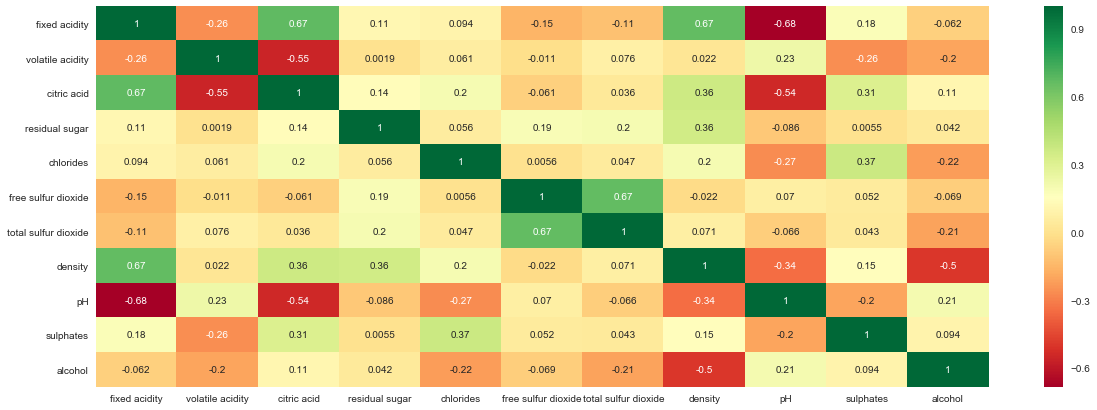

In [11]:
%matplotlib inline
plt.figure(figsize=(20,7))
sns.heatmap(vinho.corr(), annot = True, cmap= "RdYlGn");

In [12]:
vinho.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Abaixo podemos ver as distribuições das colunas.

Apenas algumas colunas apresentam uma distribuição em formato de sino (formato típico de uma distribuição normal), que são as colunas *density* e *pH*.

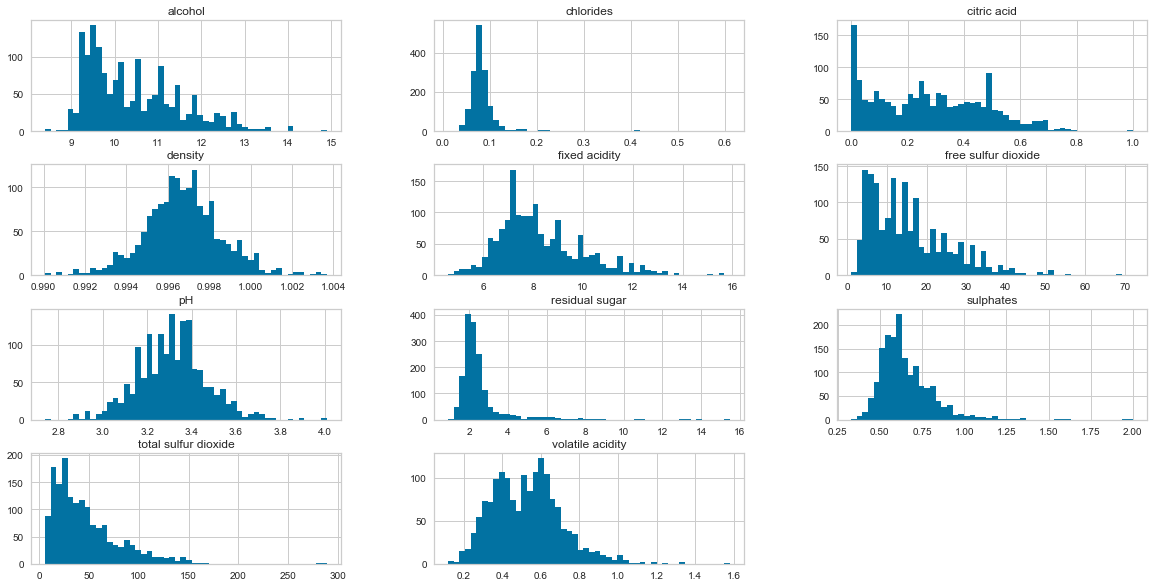

In [13]:
vinho.hist(figsize=(20,10),bins=50);

Podemos fazer o teste *Shapiro-Wilk* para identificar qual coluna tem ou não uma distribuição normal.

O teste *Shapiro-Wilk* tem como hipótese nula que de os dados possuem uma distribuição normal.

In [14]:
for coluna in vinho.columns:
    print('A estatística do teste é :',stats.shapiro(vinho[coluna])[0], 'e o p-valor é: ',stats.shapiro(vinho[coluna])[1])

A estatística do teste é : 0.942030668258667 e o p-valor é:  1.5255951637239901e-24
A estatística do teste é : 0.9743340611457825 e o p-valor é:  2.686806772838566e-16
A estatística do teste é : 0.9552900195121765 e o p-valor é:  1.0208196357632134e-21
A estatística do teste é : 0.5660765171051025 e o p-valor é:  0.0
A estatística do teste é : 0.4842468500137329 e o p-valor é:  0.0
A estatística do teste é : 0.9018407464027405 e o p-valor é:  7.6973984391279615e-31
A estatística do teste é : 0.8732253909111023 e o p-valor é:  3.5741436086741964e-34
A estatística do teste é : 0.9908668398857117 e o p-valor é:  1.9400959061499634e-08
A estatística do teste é : 0.993486762046814 e o p-valor é:  1.7136950418716879e-06
A estatística do teste é : 0.8330425024032593 e o p-valor é:  5.821617678881608e-38
A estatística do teste é : 0.9288389682769775 e o p-valor é:  6.643664824998876e-27


Com base nas estatísticas e no p-valor gerado pelo teste constatamos que a 5% de nível de significância, que nenhuma das colunas apresentam uma distribuição normal nos seus dados.

Os gráficos *boxplots* das colunas não apresentam nenhuma valor extremos (*outliers*).

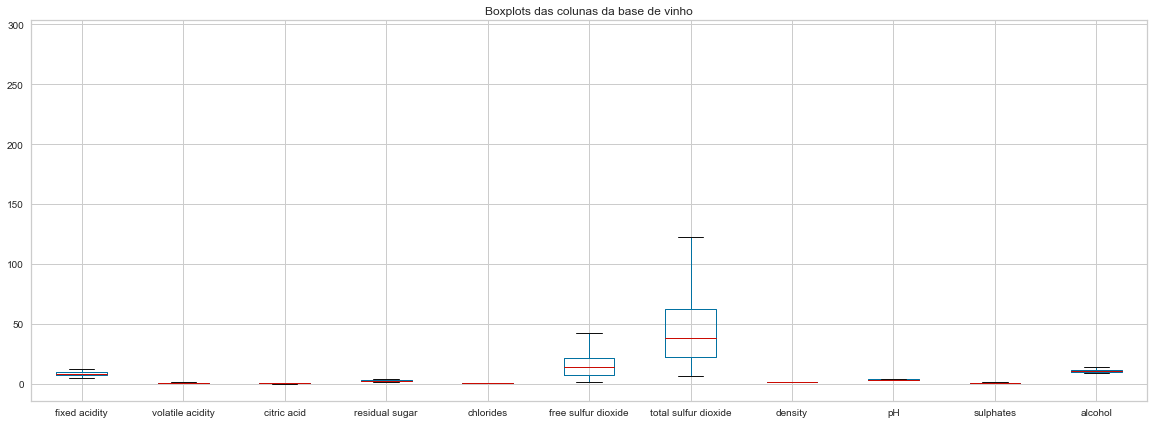

In [15]:
vinho.plot.box(figsize=(20,7), title='Boxplots das colunas da base de vinho');

## Redução de dimensionalidade

Temos ao todo 11 *features*, porém seria desejável um número menor de *features* para esse processo de agrupamento. Por isso iremos reduzir o número de variáveis aplicando a técnica do **PCA** (*Principal Components Analisys* ou Análise de Componentes Principais).

Vamos intanciar o método PCA e vamos selecionar as *features* que tenham 95% da variância.

In [16]:
pca=PCA(0.95)

Vamos treinar esse modelo com os dados.

In [17]:
pca.fit(vinho)

PCA(n_components=0.95)

E como podemos ver, ao invés de termos 11 *features*, agora temos apenas 2.

In [18]:
pca.n_components_

2

Vamos aplicar para nossa base de dados.

In [19]:
vinho_pca=pca.transform(vinho)

Vamos transformar esse resultado em um *dataset*.

In [20]:
vinho_pca=pd.DataFrame(vinho_pca, columns=['feature 1','feature 2'])

#### Vamos visualizar esse a nova base de dados

Temos duas colunas com as *features* transformadas pelo processo do **PCA**.

In [21]:
vinho_pca

,feature 1,feature 2
0,-13.224905,-2.023900
1,22.037724,4.408322
2,7.162673,-2.501461
3,13.430063,-1.951122
4,-13.224905,-2.023900
...,...,...
1594,1.129111,16.313102
1595,9.489984,21.627525
1596,-3.431354,14.271243
1597,1.132878,16.316167


A coluna *feature 1* não apresenta 

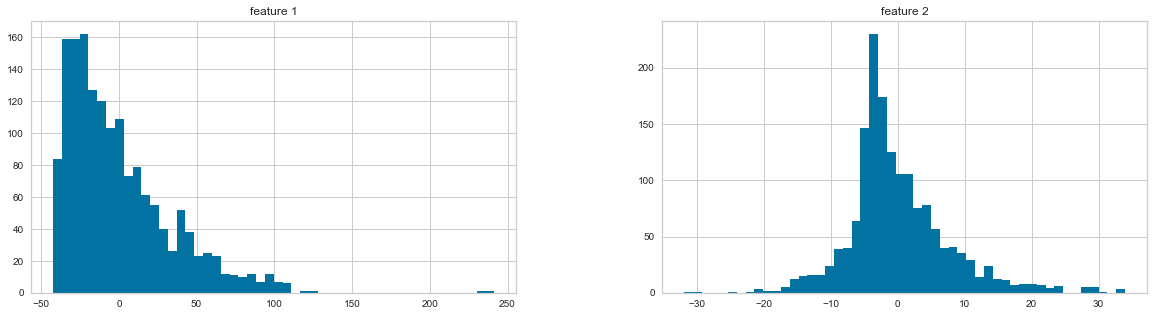

In [22]:
vinho_pca.hist(figsize=(20,5),bins=50);

As colunas dessa nova base não apresentam *outliers*, conforme os *boxplots* abaixo.

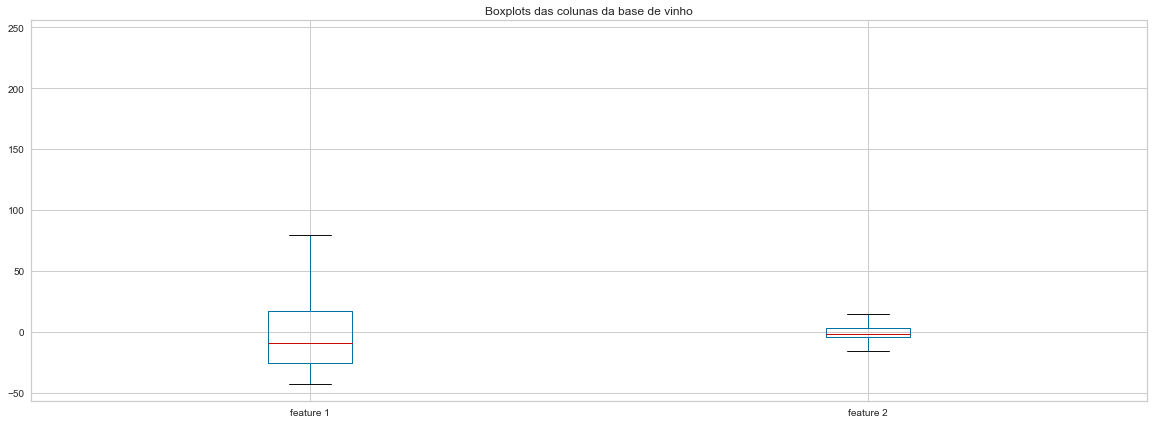

In [23]:
vinho_pca.plot.box(figsize=(20,7), title='Boxplots das colunas da base de vinho');

## Modelagem dos dados

Como falamos anteriormente esse problema não-supervisionado, então não temos um *rótulo* ou uma variável alvo ou *target* para aplicar no modelo. Iremos apenas criar grupos similares com os algoritmos que temos a disposição. 

Antes de aplicarmos os modelos iremos, primeiramente, tentar estimar o número de grupos ou *clusters*. Existem algumas formas de tentarmos estimar o número de grupos, uma das forma é retirando a raiz quadrada do número de observações e dividindo esse valor por, teríamos:

$\frac{\sqrt(N)}{2} = \frac{\sqrt(1599)}{2} = \frac{39.987}{2} = 19.993 \approx 20$

Assim, com base nessa fórmula, teremos aproximadamente 20 *clusters*, porém esse valor é elevado para termos um número de *clusters*. A princípio o objetivo dessa base de dados é para desafios de classificação onde classificaríamos se o tipo de vinho é bom ou ruim (problema de classificação binária), ou qual a qualidade do vinho, que ia de 1 a 10 (problema de classificação múltipla). Entretanto, para esse projeto, iremos apenas usar os modelos e identificar grupos sem levarmos em consideração o que foi proposto por quem disponibilizou a base de dados.

Vamos tentar estimar o número de clusters de cada algoritmo utilizando as seguintes técnicas:

1) *Silhouette score*: mede a distância entre cada ponto de dados, o centróide do cluster ao qual foi atribuído e o centróide mais próximo pertencente a outro cluster. O  *Silhouette score* (como esses valores são chamados) próximos a +1 indicam que a amostra está longe dos clusters vizinhos. Um valor de 0 indica que a amostra está no ou muito próxima do limite de decisão entre dois clusters vizinhos e valores negativos indicam que essas amostras podem ter sido atribuídas ao cluster errado.

2) *Elbow Score*.

### *KMeans*

O primeiro modelo que usaremos será o *K-Means* que é um dos principais algoritmos de agrupamento. É um algoritmo do tipo particional e tenta separar grupos ou *clusters* que tenham variância igual minimizando um critério chamado de *inércia* ou a soma dos quadrados dentro do *cluster* (*within-cluster sum-of-squares*).

Esse algoritmo requer que o número de *clusters* seja especificado e ele se adapta muito bem a grandes amostras de dados. O algoritmo *K-means* visa escolher centróides que minimizem a inércia (*wcss*) e a fórmula da inércia pode ser dada por :

$ \sum^n_{i=0} min_{\mu_{j} \in C}(||x_{i} - \mu_{j}||^{2})$ 

Onde $C$ são os aglomerados disjuntos, $\mu_{j}$ a média das amostras no cluster, $n$ o número de amostras.

Como falamos anteriormente temos que estimar o número de *clusters*.

A primeira forma de escolhermos o número de *cluster* é utilizando o *Elbow method* que utiliza o *wcss* para definir o número ótimo de grupos.

In [24]:
wcss=[]

for i in range(1,21):
    mbk=KMeans(n_clusters=i, init='random')
    mbk.fit(vinho_pca)
    print(i,mbk.inertia_)
    wcss.append(mbk.inertia_)

1 1904404.493085276
2 682242.7093357194
3 385718.228438098
4 273523.2930130877
5 211676.97449613293
6 183910.32624032002
7 166002.96675162096
8 125336.25753612649
9 131115.24198251838
10 123121.82172292545
11 84595.70605302963
12 79754.2342446562
13 77861.75289485476
14 69503.8578536701
15 67227.20148490618
16 61258.442257039686
17 61612.753116806685
18 54522.00903677338
19 51747.51963684378
20 49614.81355259562


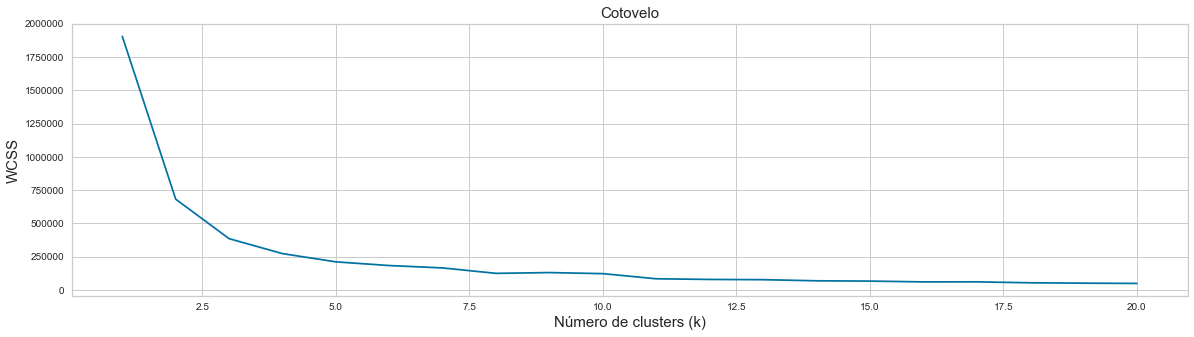

In [25]:
plt.figure(figsize=(20,5))
plt.plot(range(1,21),wcss)
plt.title('Cotovelo',size=15)
plt.xlabel('Número de clusters (k)',size=15)
plt.ylabel('WCSS',size=15)
plt.show()

Aplicando o método *KElbowVisualizer* da biblioteca *Yellow Bricks* nos deu um resultado de 4 *clusters*.

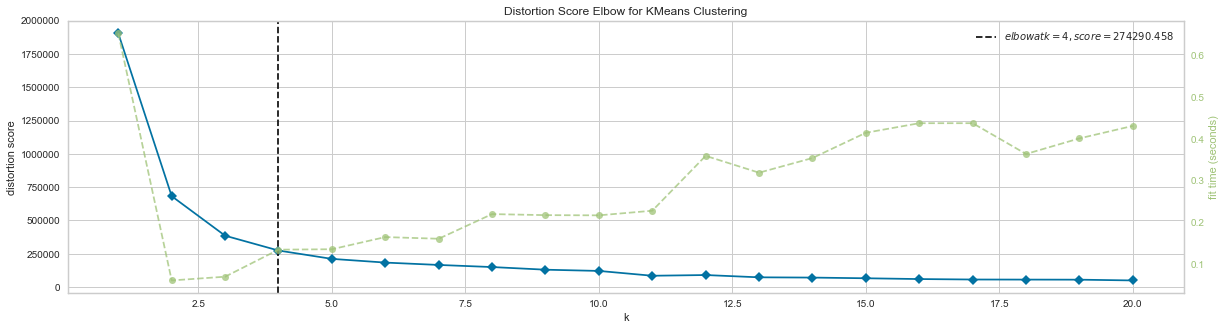

In [26]:
visualizer = KElbowVisualizer(KMeans(init='random'), k=(1,21))
plt.figure(figsize=(20,5))
visualizer.fit(vinho_pca)
visualizer.show();

#### Utilizando o *silhouette score* e o *Davies Bouldin score*

Com essas duas métricas podemos escolher os número de *clusters* ótimos para o nosso modelo.

Vamos gerar os valores do *silhouette score* e para o *Davies Bouldin Score* de 2 a 20 *clusters*. O *silhouette score* vai apontar o *cluster* que tenha o menor valor. Já o *Davies Bouldin score* deve ter o *cluster* que tiver o maior valor.

Vamos gerar duas listas com os valores das métricas e depois plotaremos esses valores.

In [27]:
lista=[]
for i in range(2,21):
    mbk=KMeans(n_clusters=i, init='random',random_state=42)
    mbk.fit(vinho_pca)
    labels=mbk.labels_
    lista.append(silhouette_score(vinho_pca,labels))

Abaixo vemos os resultados dos *silhouette score*.

In [28]:
lista

[0.6089415624959099,
 0.532247228726744,
 0.495303340472156,
 0.4607841038519715,
 0.4199868682632002,
 0.41752633443368026,
 0.4175003641407389,
 0.3698686178029964,
 0.38434982170917825,
 0.376777200773998,
 0.3752308521313512,
 0.3855406861705754,
 0.37427750565491585,
 0.3708684673533237,
 0.36696809093533467,
 0.3598563672790784,
 0.3536343142092566,
 0.3562487938253607,
 0.3729814050599296]

O gráfico mostra abaixo que o valor mais próximo do valor de 1 é o caso de termos 2 *clusters*, o que se choca com o que encontramos com o *Elbow Method* (4 grupos).

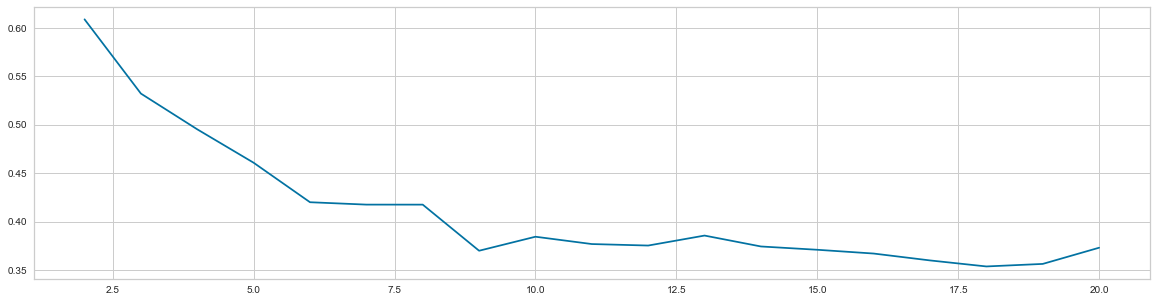

In [29]:
plt.figure(figsize=(20,5))
plt.plot(range(2,21),lista);

Para que tenhamos um bom resultado de separação as silhouetas que devem passar da linha de *silhouette score* médio (tracejada e de cor vermelha) e as silhouetas devem ser semelhantes.

Abaixo vemos que 4 *clusters* tiveram uma separação melhor que 2 *clusters*, então escolheremos o definido pelo método *elbow*.

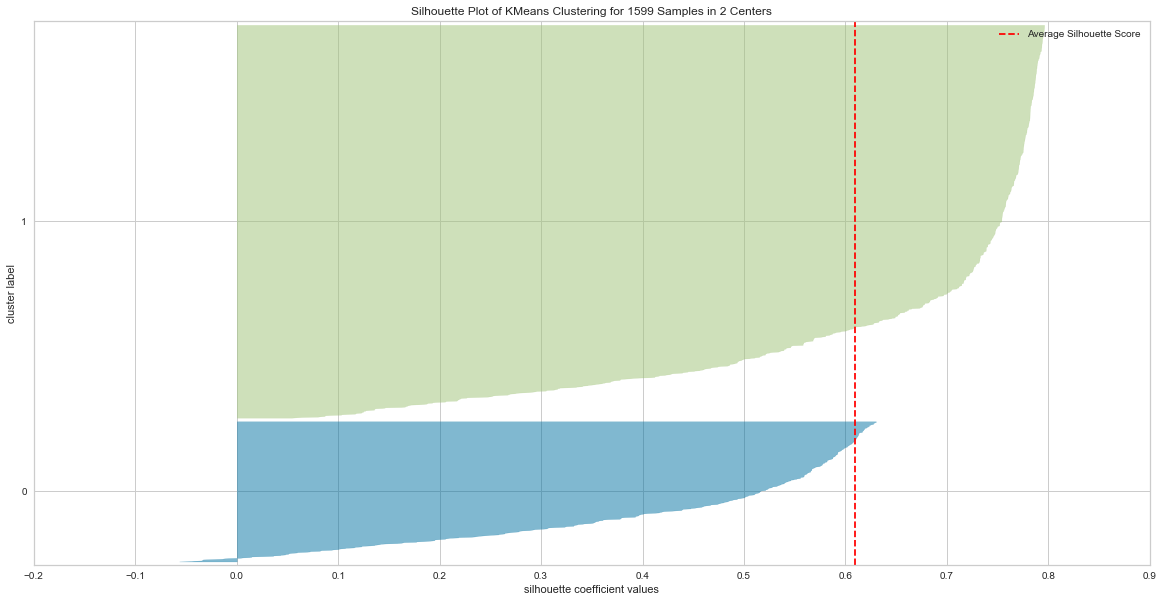

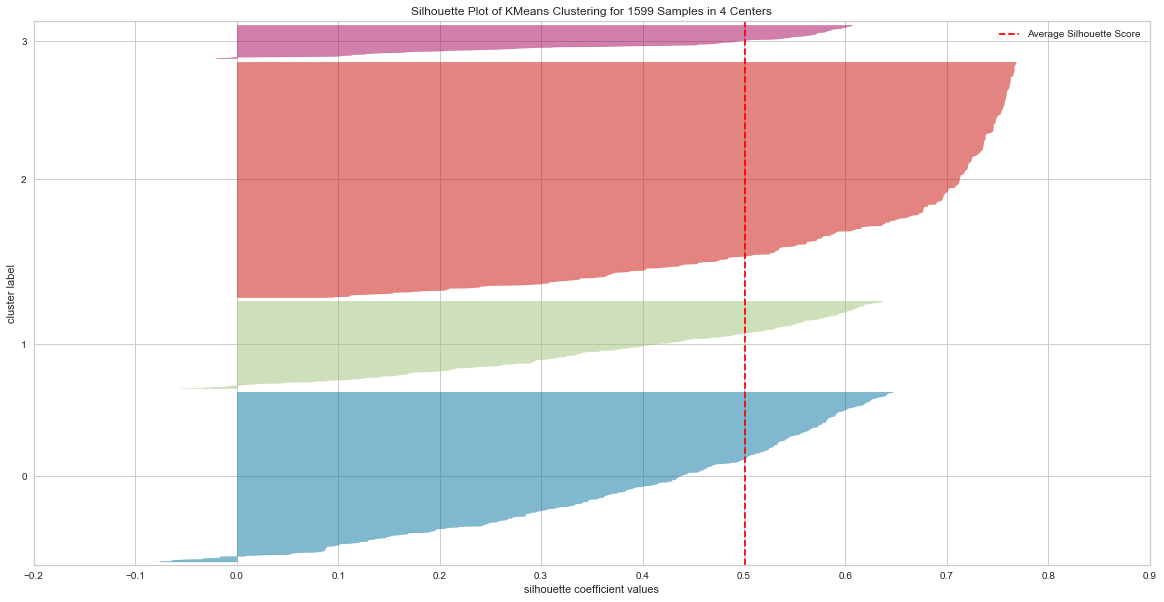

In [30]:
for i in [2,4]:
    plt.figure(figsize=(20,10))
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(vinho_pca)
    visualizer.show()

Vamos gerar os *clusters* com o algoritmo *KMeans*.

In [31]:
kmeans=KMeans(n_clusters=4, init='random',random_state=42)
kmeans.fit(vinho_pca)

KMeans(init='random', n_clusters=4, random_state=42)

Abaixo vamos ver os centróides, que nada mais são que os centros de cada *cluster* que geramos.

In [32]:
centroids= kmeans.cluster_centers_
centroids

array([[ 82.14615664,  -4.58189515],
       [-27.27845629,  -1.77149085],
       [ 34.38924013,   0.96913144],
       [ -0.10019447,   2.95180572]])

Temos então a distância de cada observação para cada *cluster*.

A primeira observação, por exemplo, está mais próxima do *cluster* 0 (**14.03622714**), a segunda está mais próxima do *cluster* 3 (**12.82138795**) e assim por diante. 

In [33]:
distance=kmeans.fit_transform(vinho_pca)
distance

array([[95.40536012, 14.0558178 , 47.70812356, 14.03622714],
       [60.77703281, 49.70186799, 12.82138795, 22.18578047],
       [75.01233882, 34.44886451, 27.44687506,  9.0822555 ],
       ...,
       [87.62962444, 28.74114883, 40.09168852, 11.79941914],
       [83.66528716, 33.68036985, 36.62672672, 13.42112624],
       [86.36520794, 23.91108043, 38.32437796,  3.77821593]])

Abaixo geramos os rótulos para cada grupo criado pelo *KMeans*.

In [34]:
labels=kmeans.labels_
labels

array([3, 2, 3, ..., 3, 3, 3])

Agora veremos o número de observações por grupo.

In [35]:
y=pd.DataFrame(labels)
y=y.astype('category')
y[0].value_counts()

1    699
3    504
2    283
0    113
Name: 0, dtype: int64

Graficamente.

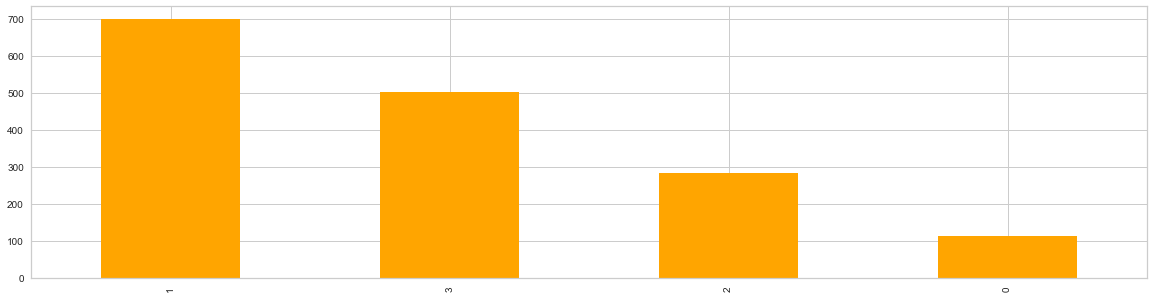

In [36]:
plt.figure(figsize=(20,5))
y[0].value_counts().plot.bar(color='orange');

Abaixo, o gráfico mostra cada um dos *clusters*. Vemos que eles estão bem divididos e onde estão os seus centróides.

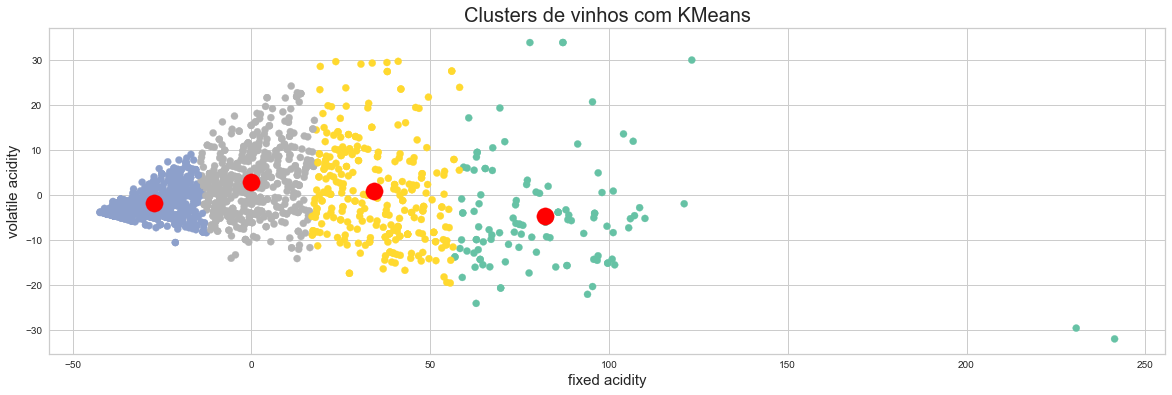

In [37]:
plt.figure(figsize=(20,6))
plt.scatter(vinho_pca['feature 1'],vinho_pca['feature 2'],s=50,c=kmeans.labels_,cmap="Set2")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='red', label='Centróides')
plt.title('Clusters de vinhos com KMeans', size=20)
plt.xlabel('fixed acidity',size=15)
plt.ylabel('volatile acidity',size=15)
plt.show()

Representação em 3 dimensões dos *clusters*.

Os centróides ficaram um pouco difícil de visualizar.

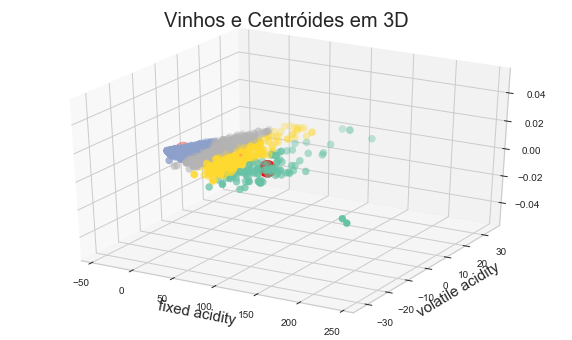

In [38]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection ="3d")
ax.scatter3D(vinho_pca['feature 1'],vinho_pca['feature 2'],s=50,c=kmeans.labels_,cmap="Set2")
ax.scatter3D(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='red', label='Centróides')
plt.title('Vinhos e Centróides em 3D', size=20)
plt.xlabel('fixed acidity',size=15)
plt.ylabel('volatile acidity',size=15)
plt.show()

Por fim, podemos ver abaixo o **mapa de distância entre *clusters*.

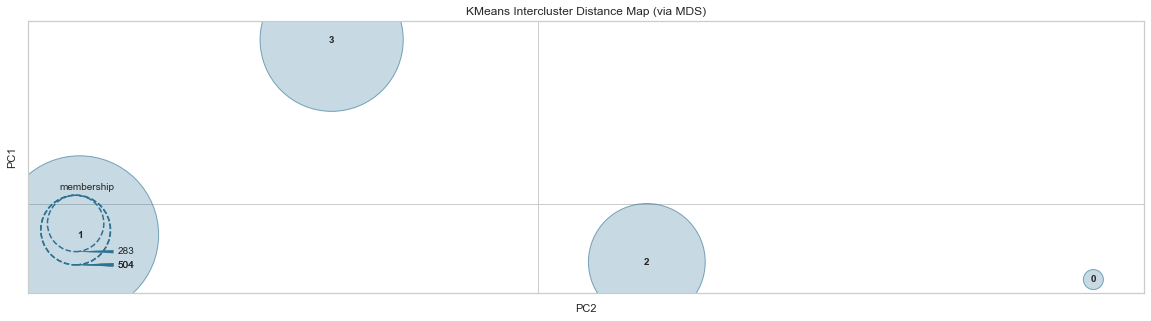

In [39]:
plt.figure(figsize=(20,5))

InterclusterDistance(kmeans).fit(vinho_pca).show();

## Conclusão

O *Kmeans* não é o único algoritmo particinal de *cluster*, mas é um dos mais conhecidos e mais usados em diversos problemas de negócio como segmentação de clientes. No nosso caso usamos esse algoritmo para identificar possíveis grupos entre diversos vinhos com várias características. Encontramos, ao fim, 4 grupos de vinhos e, com isso, o produtor de vinho pode traçar algum tipo de estratégia para esse produto.